In [55]:
import jax, jax.numpy as jnp, numpy as np
from src.JaxSimulation.operator import circFilter
from src.JaxSimulation.transmitter import simpleWDMTx, upsample
import matplotlib.pyplot as plt
from scipy.fftpack import fft, ifft
tx_data = simpleWDMTx(False, jax.random.PRNGKey(0), batch=1, M=16, Nbits=40000, sps=16, Nch=1, Nmodes=1, Rs=36e9, freqspace=50e9, Pch_dBm=0)

# parameters and attenuation function
Ld = 40    # [km] dispersion length
Lnl = 400  # [km] nonlinear length
La = 21.73 # [km] attenuation length
Ls = 80    # [km] span length
gamma = Ld/Lnl
print('gamma =', gamma)

def f(z):
    return np.exp(-1/La*(Ld*z % Ls))


Sample rate fa: 5.76e+11, Cut off frequency fc: 2.5e+10, fa > 2fc: True
 simpleWDMTx complete, time cost(s):1.5650274753570557
gamma = 0.1


In [56]:
x = np.squeeze(tx_data['SymbTx'])

In [57]:
import pickle
X,z = pickle.load(open('data/Xcoeff_161_dz0.01_zmax16_Ts0.5_2D.pkl', 'rb'))
Xint = np.sum(X*f(z)[:, None, None]*z[1], axis=0)
Ts = 0.5

In [58]:
z

array([0.000e+00, 1.000e-02, 2.000e-02, ..., 1.598e+01, 1.599e+01,
       1.600e+01], dtype=float32)

In [71]:
A = np.zeros(x.shape, dtype=complex)
B = np.zeros(x.shape, dtype=complex)
for m in range(-40, 41):
    for n in range(-40, 41):
        if m*n == 0:
            A = A + np.roll(x, m)*np.roll(x, n)*np.roll(x, m+n).conj()
        else:
            B = B + np.roll(x, m)*np.roll(x, n)*np.roll(x, m+n).conj()

A = A / x
B = B / x

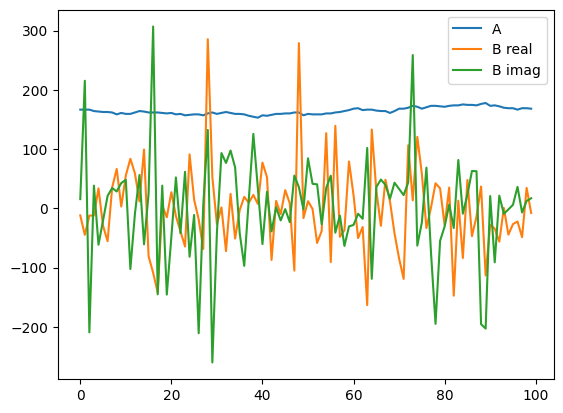

In [73]:
s,e = 0, 100
plt.plot(A.real[s:e], label='A')
plt.plot(B.real[s:e] - np.mean(B.real[s:e]), label='B real')
plt.plot(B.imag[s:e] - np.mean(B.imag[s:e]), label='B imag')
plt.legend()

In [6]:
import torch , torch.nn as nn 

net = nn.Linear(10, 1, bias=False)
x = torch.rand(1,10)

In [9]:
net(x)

tensor([[0.7782]], grad_fn=<MmBackward0>)

In [14]:
net.weight.shape

torch.Size([1, 10])